# STAGE - 1

## NAMA KELOMPOK - LEVAMTA :
1. Agis Fauzi Rachman<br>
2. Ahmad Mirza<br>
3. Hendri Angkasa<br>
4. Karina Kristanti<br>
5. Lina Utami Ningsih<br>
6. Raisya Ayu Widiyanti

---

## 1. Descriptive Statistics (15 poin)

Gunakan function *info* dan *describe* pada dataset final project kalian. Tuliskan hasil observasinya, seperti: <br>
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?<br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?<br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?<br>
(min/mean/median/max/unique/top/freq)<br>

*Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,<br>
misal untuk A: “Semua tipe data sudah sesuai”

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df = pd.read_csv('Ecommerce Shipping Data.csv')

In [3]:
#melihat data
df.sample(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
6148,6149,C,Road,4,5,242,2,medium,F,5,4806,0
6821,6822,F,Ship,6,3,260,4,low,M,9,1131,1
1388,1389,A,Ship,5,1,230,3,low,F,43,2994,1


*Data Description* <br>
- **ID**: ID Number of Customers.<br>
- **Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.<br>
- **Mode of shipment**: The Company Ships the products in multiple way such as Ship, Flight and Road.<br>
- **Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.<br>
- **Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).<br>
- **Cost of the product**: Cost of the Product in US Dollars.<br>
- **Prior purchases**: The Number of Prior Purchase.<br>
- **Product importance**: The company has categorized the product in the various parameter such as low, medium, high.<br>
- **Gender**: Male and Female.<br>
- **Discount offered**: Discount offered on that specific product.<br>
- **Weight in gms**: It is the weight in grams.<br>
- **Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [4]:
df=df.rename(columns=({'Reached.on.Time_Y.N': 'Late_Y.N'}))
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Late_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Kolom 'Reached.on.Time_Y.N' lebih cocok diganti menjadi 'Late_Y.N' dikarenakan biasanya nilai 1 berarti Iya dan 0 berarti Tidak.

In [5]:
df['ID'] = df['ID'].astype('object')
df['Late_Y.N'] = df['Late_Y.N'].astype('object')

In [6]:
#melihat informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  object
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Late_Y.N             10999 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.0+ MB


- Dataset terdiri dari 10.999 baris dan 12 tabel.
- Tidak ada variable yang memiliki missing value
- Tipe data sudah sesuai beserta namanya

In [7]:
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender','Late_Y.N']
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases' ,'Discount_offered', 'Weight_in_gms']

In [8]:
df[cats].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Late_Y.N
count,10999,10999,10999,10999,10999
unique,5,3,3,2,2
top,F,Ship,low,F,1
freq,3666,7462,5297,5545,6563


In [9]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


- Customer yang melakukan telepon terkait pengiriman rata-rata sebanyak 4x, dengan yang terbanyak 7x dan terkecil 2x.
- Rating customer rata-rata 3 dengan rating terkecil 1 dan terbesar 5.
- Harga produk berada sekitar 210 USD dengan harga terkecil sebesar 96 USD dan terbesar adalah 310 USD.
- Rata-rata pembelian sebelumnya yang dilakukan customer sebanyak 3-4x dengan yang paling sedikit sebanyak 2x dan terbanyak 10x.
- Diskon yang diberikan rata-rata 13% dengan yang terkecil adalah 1% dan terbesar adalah 65%.
- Berat produk rata-rata 3.6 kg dengan yang paling ringan adalah 1 kg dan terberat adalah 7.8 kg.

**Pada kolom diskon memiliki rata-rata 13% sedangkan nilai terbesar mencapai 65% hal ini akan menyebabkan outlier.**
**Pada kolom prior_purchase memiliki rata-rata 3 sedangkan nilai terbesar mencapai 10 hal ini akan menyebabkan outlier.**

---

## 2. Univariate Analysis (25 poin)

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). <br>
Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya <br>
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb).<br> 
Jelaskan juga apa yang harus di-follow up saat data pre-processing.

In [10]:
#mengatur ukuran grafik
from matplotlib import rcParams
rcParams ['figure.figsize'] = (10,7)

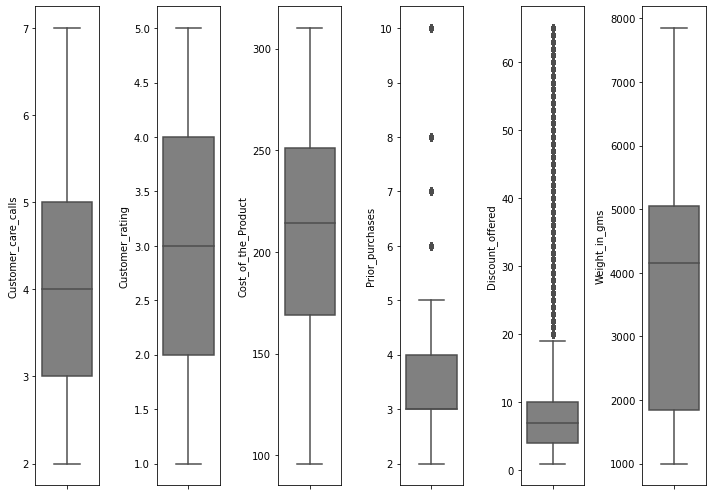

In [11]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

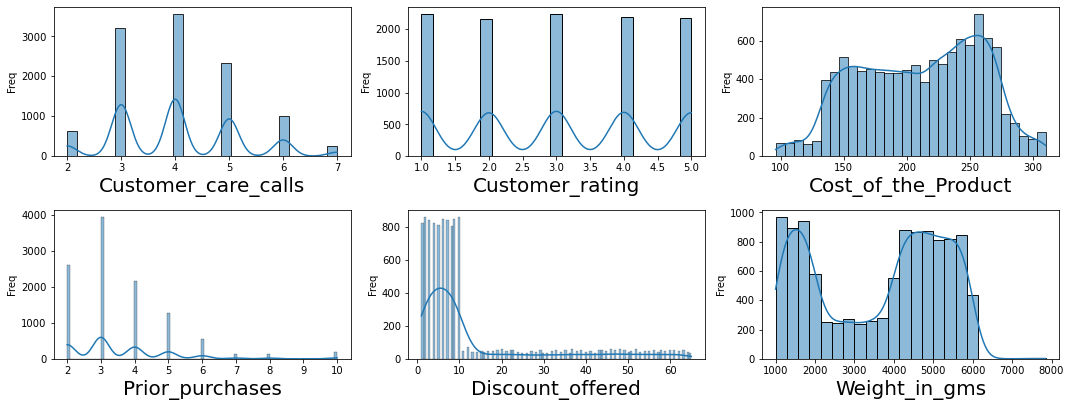

In [12]:
plt.figure(figsize=(15, 8))
for i in range(len(nums)):
    plt.subplot(len(nums)//2, 3, i+1)
    ax = sns.histplot(
        x = df[nums[i]],
        kde = True
    )
    ax.set_xlabel(nums[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 10)
plt.tight_layout()

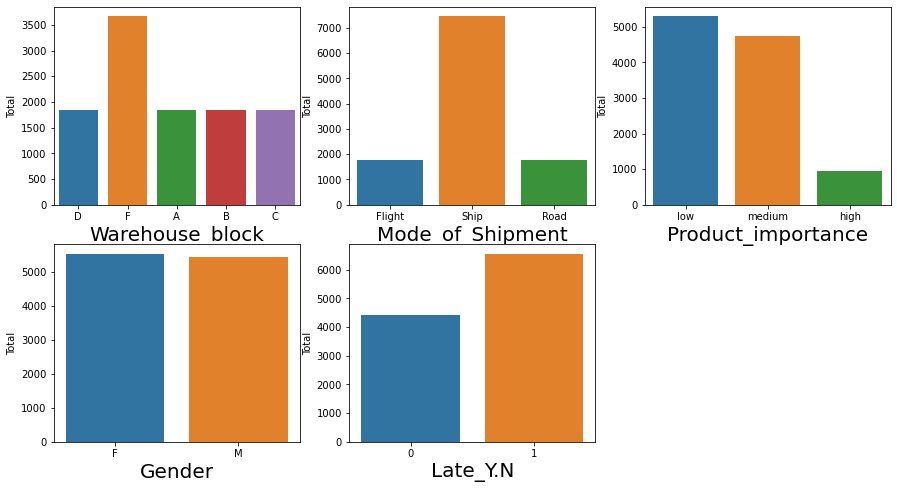

In [18]:
plt.figure(figsize=(15, 8))
for i in range(len(cats)):
    plt.subplot(len(cats)//2, 3, i+1)
    ax = sns.countplot(
        x = df[cats[i]],
    )
    ax.set_xlabel(cats[i], fontsize = 20)
    ax.set_ylabel("Total", fontsize = 10)
plt.show()

Hasil Observasi Kolom Data:<br>
- Skewed: Prior_purchases (positive), Discount_offered (positive)<br>
- Bimodal: Cost_of_the_Product, Weight_in_gms<br>
- Trimodal & Multimodal: Customer_care_calls, Customer_rating<br>
- Kolom dengan outlier: Prior_purchases, Discount_offered
- Jumlah shipment dengan "Ship" jauh lebih banyak (dominan) dibandingkan shipment lainnya yaitu sebanyak 7462 dari 10999 data.
- Jumlah product importance kategori "high" jauh lebih sedikit dibandingkan kategori lainnya yaitu sebanyak 948 dari 10999 data.

---

## 3. Multivariate Analysis (15 poin)

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang <br>
diajarkan di kelas). Tuliskan hasil observasinya, seperti:<br>

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana<br>
saja yang paling relevan dan harus dipertahankan?<br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu<br>
dilakukan terhadap feature itu?<br>

*Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

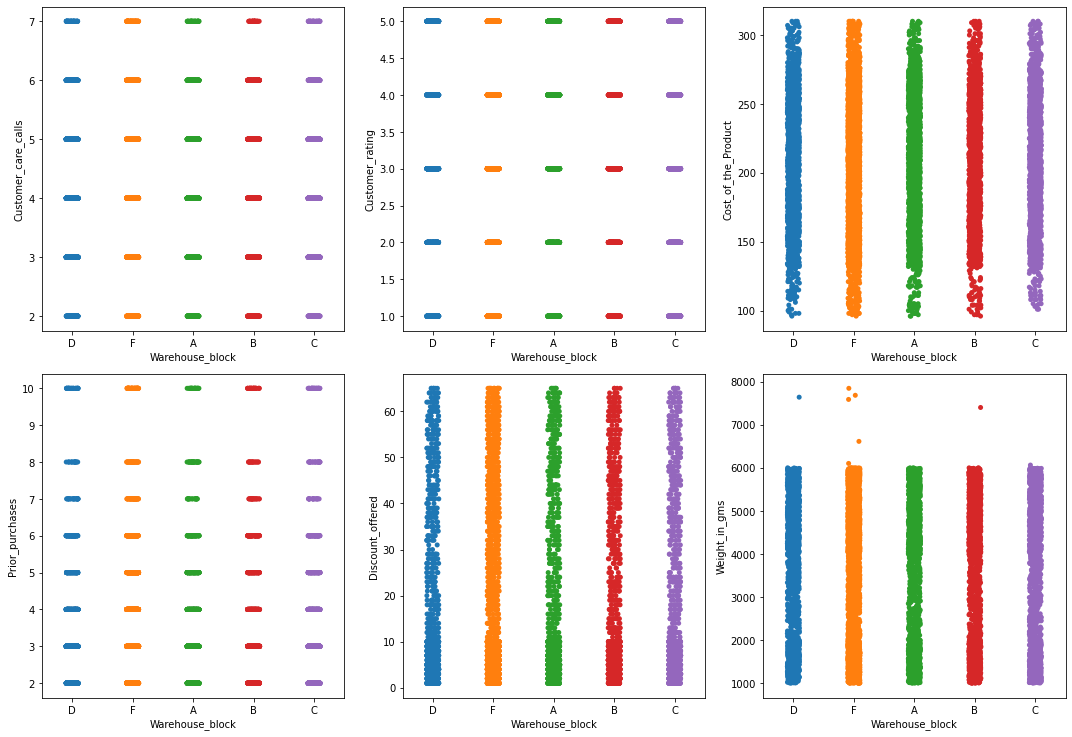

In [19]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Warehouse_block', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

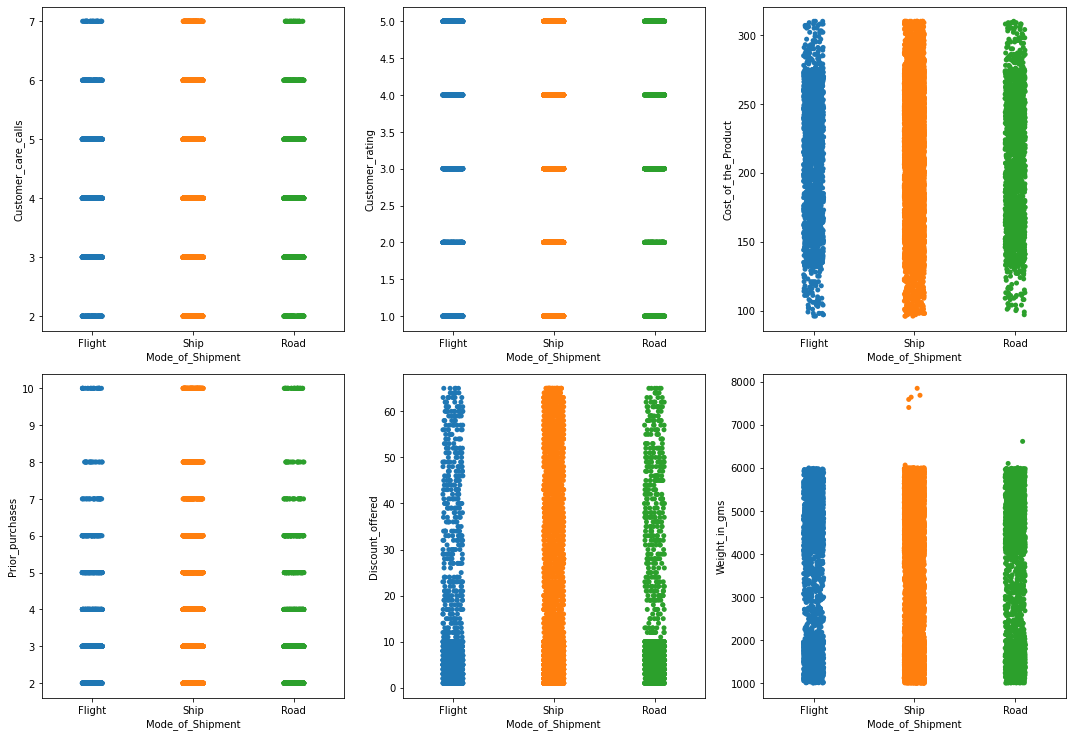

In [20]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Mode_of_Shipment', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

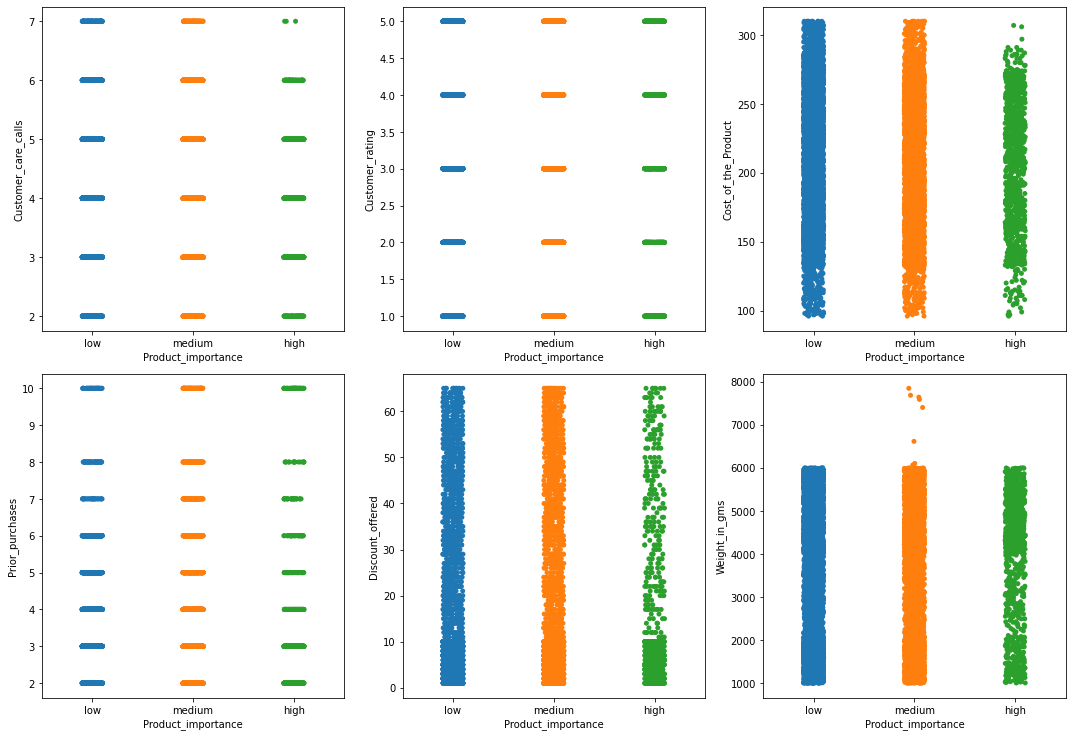

In [21]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Product_importance', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

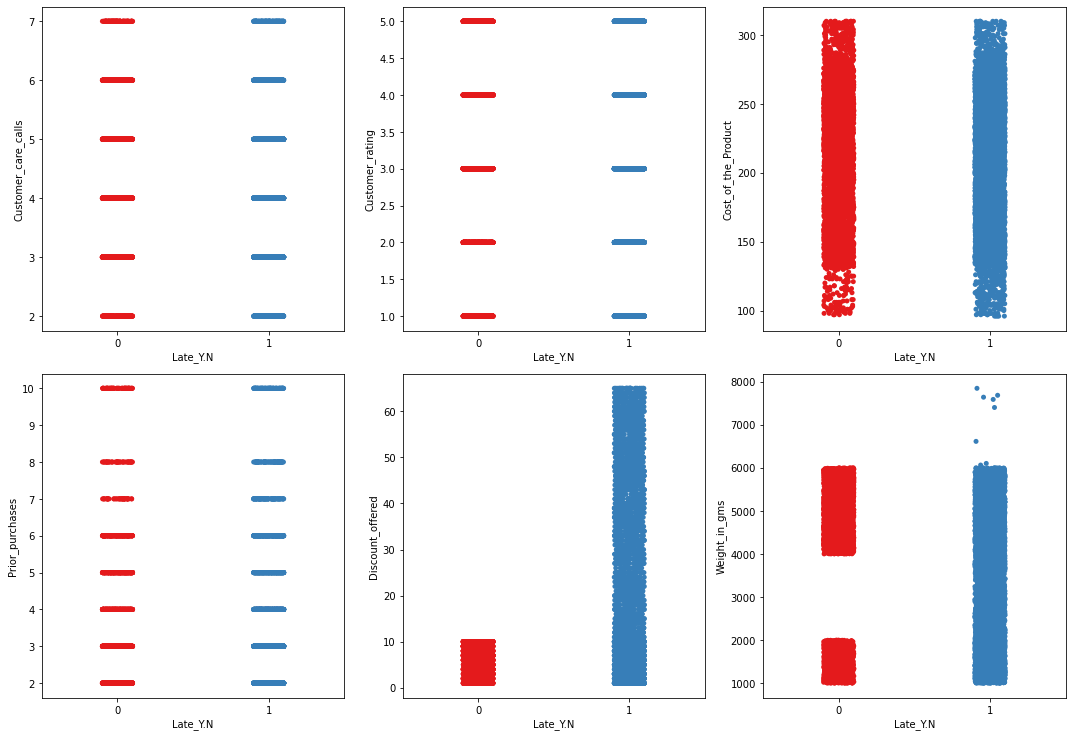

In [22]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Late_Y.N', y=nums[i], palette='Set1') # gambar catplot/stripplotnya
    plt.tight_layout()

In [23]:
df.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000


<AxesSubplot:>

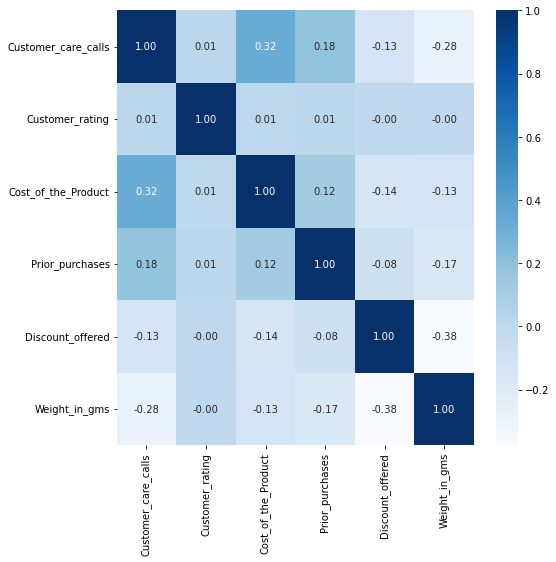

In [24]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1080x1080 with 0 Axes>

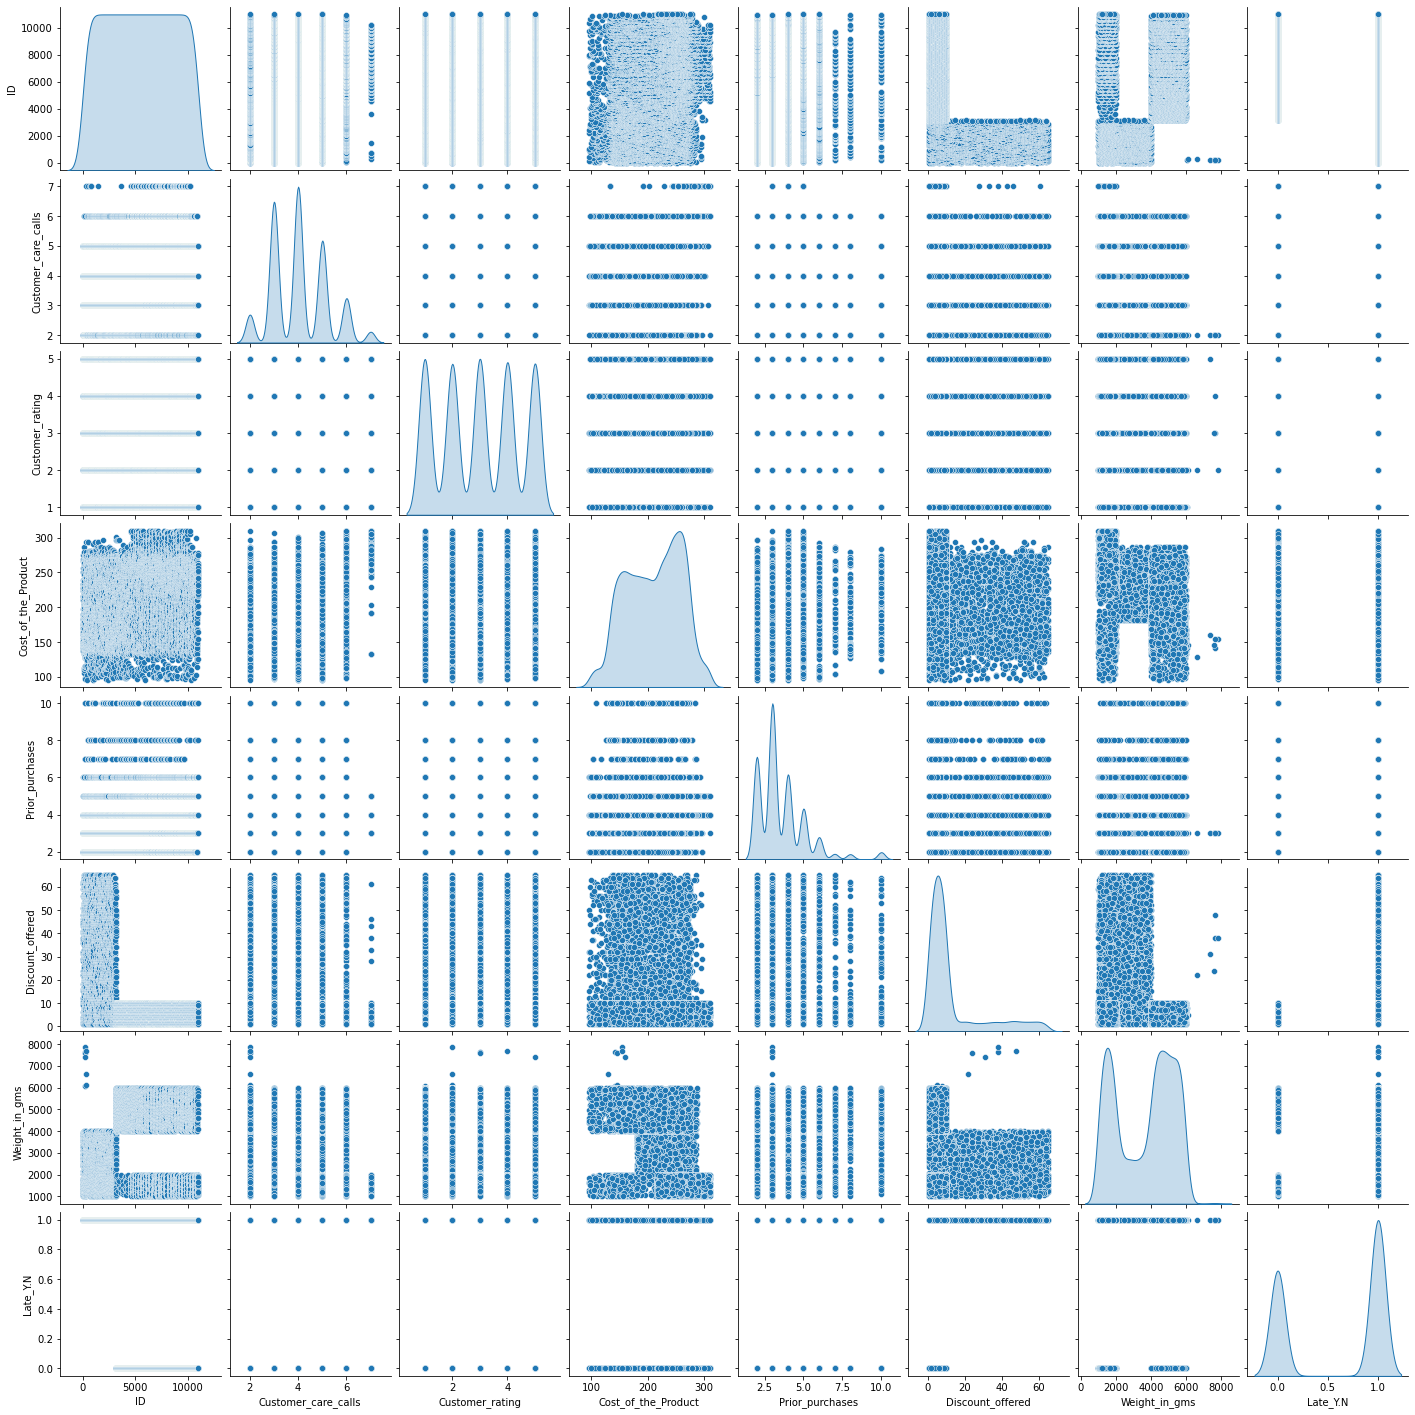

In [25]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

Hasil Observasi Korelasi:<br>
- Tidak ada feature yang saling berkorelasi kuat (r>0.7).

## 4. Business Insight (30 poin)

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu<br>
business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan<br>
rekomendasinya untuk bisnis.

<AxesSubplot:xlabel='ID', ylabel='Discount_offered'>

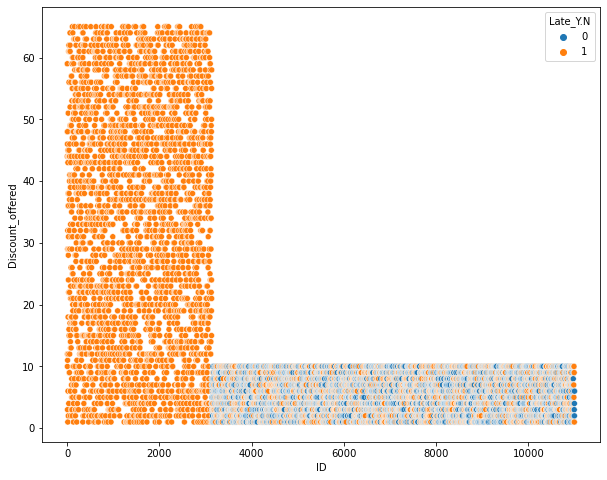

In [34]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df,x=df['ID'],y=df['Discount_offered'],hue=df['Late_Y.N'])

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Count'>

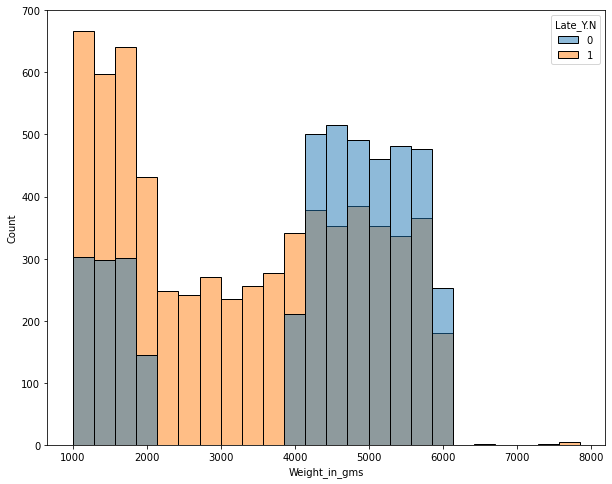

In [47]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df,x=df['Weight_in_gms'],hue=df['Late_Y.N'])

- 100% pengiriman untuk ID customer sekitar 0-3000 selalu terlambat dan disertai diskon yang jauh lebih besar dibandingkan customer-customer baru.
- 100% pengiriman dengan diskon > 10% diberikan pada ID cust sekitar 0-3000 dan sselalu terlambat 
- 100% pengiriman dengan berat 2000 < x < 4000 selalu terlambat.

---

## 5. Git (15 poin)